In [1]:
from utility_bferror import *
import datetime

tb = BFSolver_Toolbox()
er = BFSovler3D_Error()

# 1. Try One Case

array([0.10640636, 0.10951   , 0.10873171])

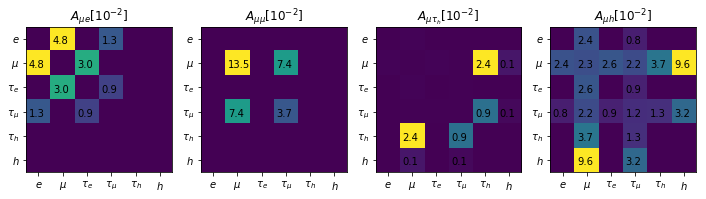

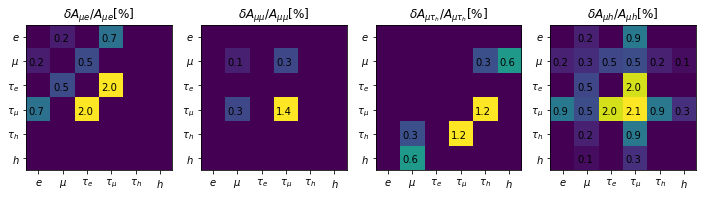

In [2]:
i,trigger = 0,"mu"

ndata,ndataVar = er.ndata[i],er.ndataVar[i]
nmcbg,nmcbgVar = er.nmcbg[i],er.nmcbgVar[i]
nfake,nfakeVar = er.nfake[i],er.nfakeVar[i]
a,aVar = er.a[i],er.aVar[i]
aVar[a<0.001]=np.zeros_like(a)[a<0.001]

tb.imshow4Matrix(a,trigger)
tb.imshow4Matrix(aVar**0.5/(a+1e-12),trigger,showError=True)

slv = BFSolver3D(a)
slv.solveQuadEqn(slv.setMeasuredX(nData=ndata, nMcbg=nmcbg+nfake))

# 2. Calculate Statistical Error

In [6]:
statistcal = [ er.errStat(source) for source in ["data","mcbg","fake","mcsg"] ]
sysCrossSection = [ er.errSystem_crossSection(source) for source in ["mcbg","fake","mcsg"] ]
sysObjectEff = [ er.errSystem_objectEff(source) for source in ["e","mu","tau"] ]
sysEnergyScale = [ er.errSystem_energyScale(source) for source in ["e","mu","tau"] ]
errSystem_ttTheory = [ er.errSystem_upDownVariation(source) for source in [ "ISR","FSR","UE","MEPS"] ]
sysJet = [ er.errSystem_upDownVariation(source) for source in ["JES","JER","BTag","Mistag"] ]
sysLHE = [ er.errSystem_upDownVariation(source) for source in ["Renorm","Factor","PDF"] ]

FileNotFoundError: [Errno 2] No such file or directory: '/Users/zihengchen/Documents/Analysis/workplace/data/count/count_ePtDown.pkl'

In [10]:
err = np.array(statistcal 
                + sysCrossSection
                + sysObjectEff
                + sysTTTheory
                + sysEnergyScale
                + sysJet
                + sysLHE
              )
err = err.transpose(1,0,2)
er.io_printErrorForExcelFormat(err)

0.538,0.508,1.181, 0.957,0.862,1.955, 0.688,0.536,1.385, 1.208,0.957,2.381
0.061,0.132,0.278, 0.064,0.126,0.326, 0.166,0.074,0.316, 0.157,0.058,0.203
0.031,0.037,0.167, 0.040,0.045,0.197, 0.000,0.000,0.000, 0.000,0.000,0.000
0.260,0.227,0.580, 0.436,0.369,0.811, 0.323,0.253,0.590, 0.552,0.445,0.956
0.272,0.373,0.118, 0.089,0.068,0.027, 0.205,0.264,0.128, 0.044,0.091,0.081
0.547,0.557,1.134, 0.571,0.565,0.970, 0.000,0.000,0.000, 0.000,0.000,0.000
0.000,0.000,0.000, 0.000,0.000,0.000, 0.000,0.000,0.000, 0.000,0.000,0.000
1.025,0.096,0.082, 1.049,0.098,0.079, 1.058,0.107,0.080, 1.016,0.100,0.080
0.138,1.182,0.126, 0.130,1.087,0.112, 0.105,1.010,0.097, 0.107,1.018,0.098
1.247,1.527,7.717, 1.083,1.304,6.726, 1.135,1.371,7.508, 0.986,1.224,6.685
0.382,0.500,4.159, 1.056,0.586,3.641, 0.108,0.828,3.622, 0.725,0.673,2.476
4.117,4.655,21.511, 2.692,4.460,16.511, 3.789,4.075,21.734, 4.170,3.858,14.760
0.150,0.647,1.034, 0.082,0.698,1.484, 0.261,0.198,0.831, 0.351,0.146,0.794
0.414,0.872,1.565, 1.

In [24]:
today = datetime.date.today()
np.save(common.dataDirectory() + "error/{}-{}-{}".format(today.year,today.month,today.day),err)